## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [2]:
input_dir = "boxplots/"

In [3]:
pwd

'/work/project/ladcol_011/polish/community/docs/showcase_notebooks/Lasry'

In [4]:
df_a_s   = pd.read_csv(input_dir + "interactions_a_s.csv", index_col=0)
df_a_r   = pd.read_csv(input_dir + "interactions_a_r.csv", index_col=0)
df_e_s_l = pd.read_csv(input_dir + "interactions_e_s_l.csv", index_col=0)
df_e_r_r = pd.read_csv(input_dir + "interactions_e_r_r.csv", index_col=0)
df_rho_s = pd.read_csv(input_dir + "interactions_rho_s.csv", index_col=0)
df_rho_r = pd.read_csv(input_dir + "interactions_rho_r.csv", index_col=0)

## Define Functions

In [5]:
def plot_and_ttest(df, interaction_name, label, ax, y_axis_label):
    subset_df = df.loc[df.index == interaction_name].T
    subset_df.columns = ["Value"]
    
    subset_df["Condition"] = ["healthy" if "healthy" in index else "AML" for index in subset_df.index]
    
    group1 = subset_df[subset_df['Condition'] == 'healthy']['Value']
    group2 = subset_df[subset_df['Condition'] == 'AML']['Value']
    t_stat, p_value = ttest_ind(group1, group2)
    
    condition_order = ["healthy", "AML"]
    
    sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
    sns.swarmplot(x='Condition', y='Value', data=subset_df, color='.25', size=14, ax=ax,order = condition_order)
    
    ax.set_title(f"{label}", fontsize=20)
    
    # Set y-axis limits based on the y_axis_label
    if 'active fraction' in y_axis_label.lower():
        ax.set_ylim(0, 1)  # Scale for active fraction
    elif 'mean normalized expression' in y_axis_label.lower():
        ax.set_ylim(0, 2)  # Scale for mean normalized expression

    upper_margin = max(subset_df['Value']) * 0.15
    upper_limit = max(subset_df['Value']) + upper_margin
    
    # Calculate the lower margin to add space for the p-value text
    lower_margin = max(subset_df['Value']) * 0.05
    lower_limit = min(subset_df['Value']) - lower_margin
    
    # Set y-axis limits with some space above the highest data point
    ax.set_ylim(bottom=lower_limit, top=upper_limit)
    
    # Place the p-value text above the highest data point with some margin
    ax.text(0.5, upper_limit - (upper_margin / 2), f"p-val: {round(p_value, 3)}", ha='center', fontsize=18)

In [6]:
def plot_interaction(interaction_name_variable,df_rho_s, df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r):
    
    # Split into sender and receiver parts
    sender_info, receiver_info = interaction_name_variable.split('_')
    sender, sender_ligand = sender_info.split(':')
    receiver, receiver_receptor = receiver_info.split(':')
    
    
    # Labels dictionary for the plot titles
    labels_dict = {

        'rho_s': f"{sender}",
        'rho_r': f"{receiver}",
        'a_r': f"{receiver}: {receiver_receptor}",
        'a_s': f"{sender}: {sender_ligand}",
        'e_r_r': f"{receiver}: {receiver_receptor}",
        'e_s_l': f"{sender}: {sender_ligand}"
    }
    
    # New dictionary for the y-axis labels
    y_axis_labels = {
        'rho_s': "cell type abundance",
        'rho_r': "cell type abundance",
        'a_s': "active fraction",
        'a_r': "active fraction",
        'e_s_l': "mean normalized expression in active fraction",
        'e_r_r': "mean normalized expression in active fraction"
    }
    
    fig, axes = plt.subplots(1, 6, figsize=(72, 12))
    
    # DataFrames and their corresponding label keys
    dfs = [df_rho_s,df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r]
    label_keys = ["rho_s","rho_r", 'a_s', 'a_r', 'e_s_l', 'e_r_r']
    
    for ax, df, label_key in zip(axes, dfs, label_keys):
        actual_label = labels_dict[label_key]
        y_label = y_axis_labels[label_key]
        plot_and_ttest(df, interaction_name_variable, actual_label, ax, y_label)  # Pass y_label to plot_and_ttest
        
        ax.set_ylabel(y_label, fontsize=18)
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

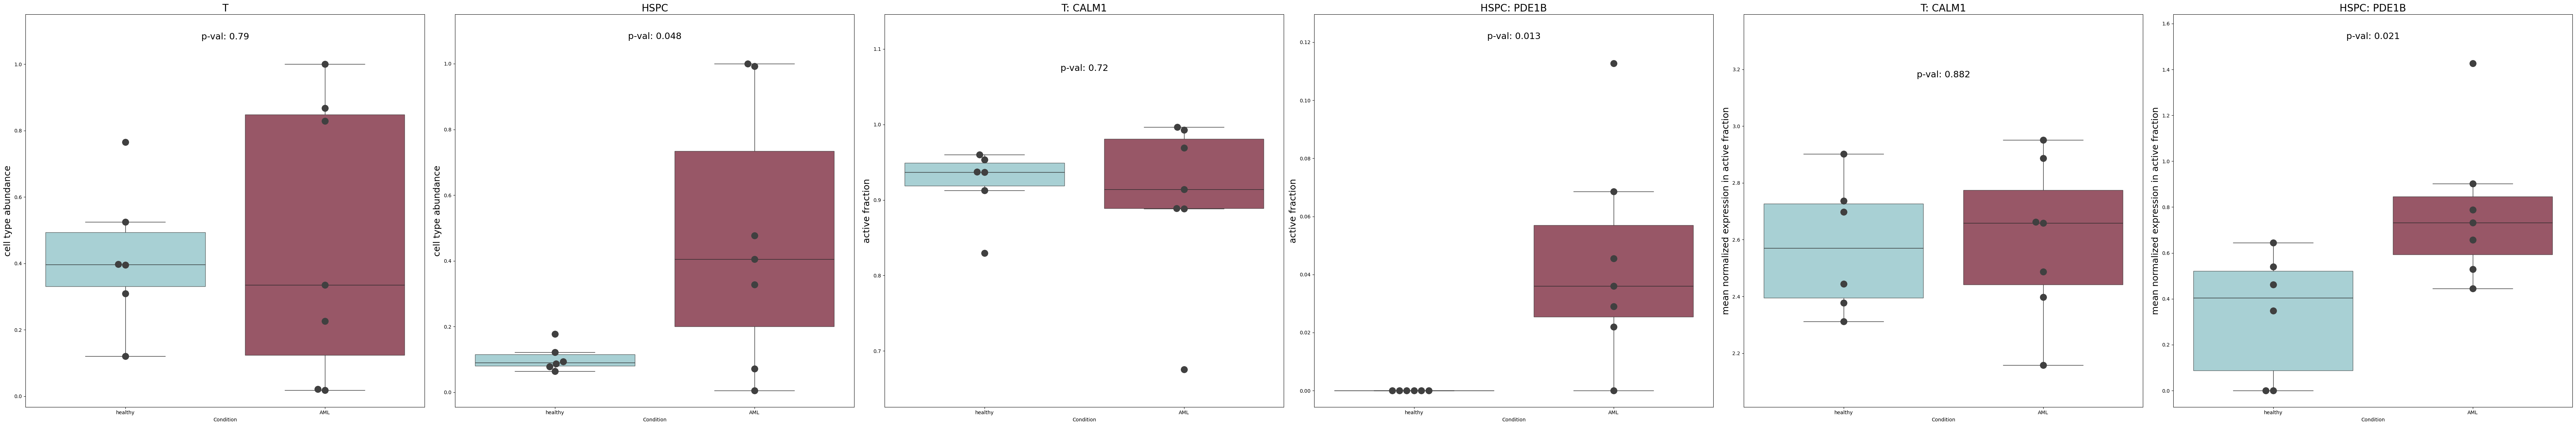

In [7]:
interaction_name_variable = "T:CALM1_HSPC:PDE1B"
plot_interaction(interaction_name_variable, df_rho_s, df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r)

/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

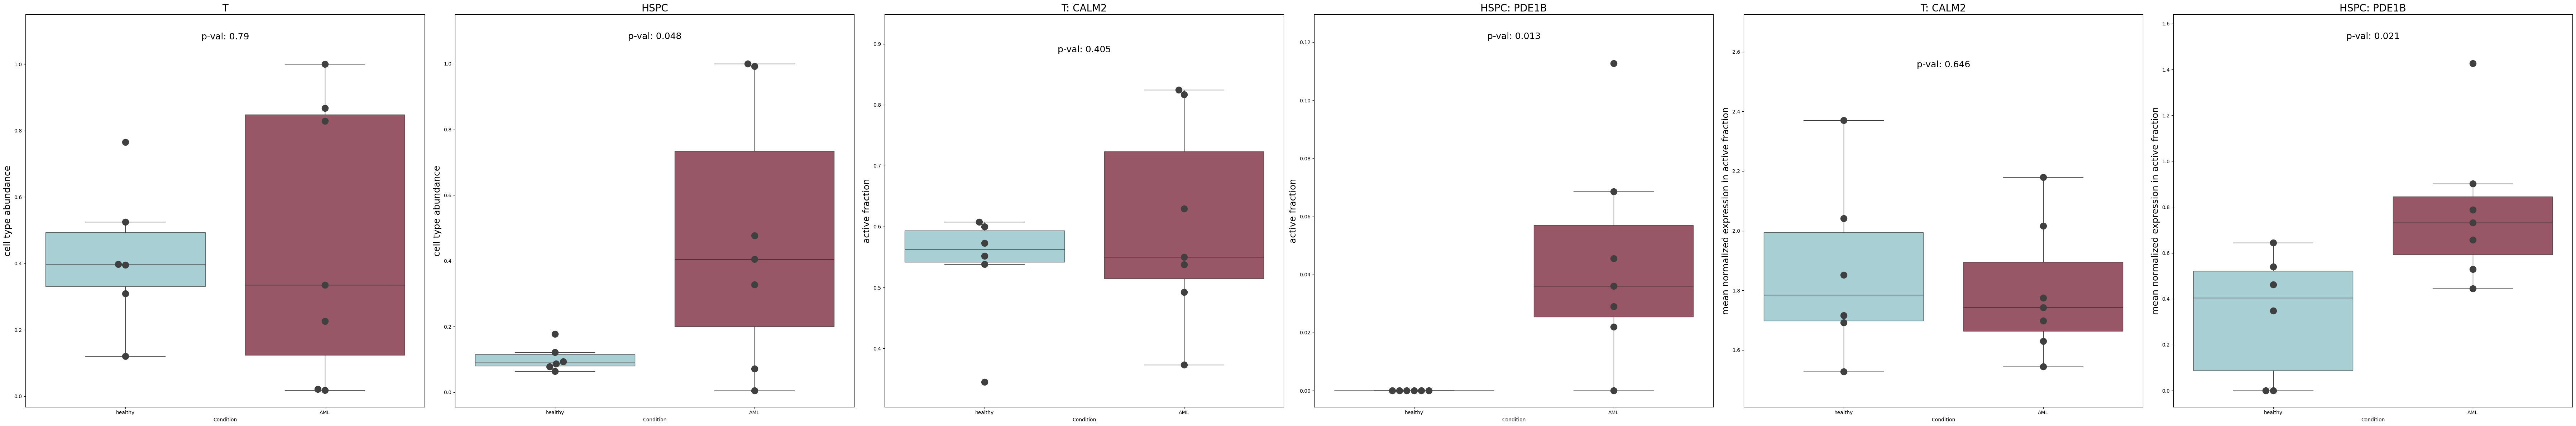

In [8]:
interaction_name_variable = "T:CALM2_HSPC:PDE1B"
plot_interaction(interaction_name_variable, df_rho_s, df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r)